In [ ]:
import pandas as pd

# Pad naar het invoer CSV-bestand
input_csv_path = 'input_file.csv'  # Verander dit naar het pad van je invoerbestand
# Pad naar het uitvoer CSV-bestand
output_csv_path = 'output_file.csv'  # Verander dit naar het gewenste pad voor je uitvoerbestand

# Lees de eerste 100 rijen van het invoerbestand
df = pd.read_csv(input_csv_path, nrows=100)

# Schrijf deze rijen weg naar het uitvoerbestand
df.to_csv(output_csv_path, index=False)  # index=False om te voorkomen dat de index als een aparte kolom wordt geschreven


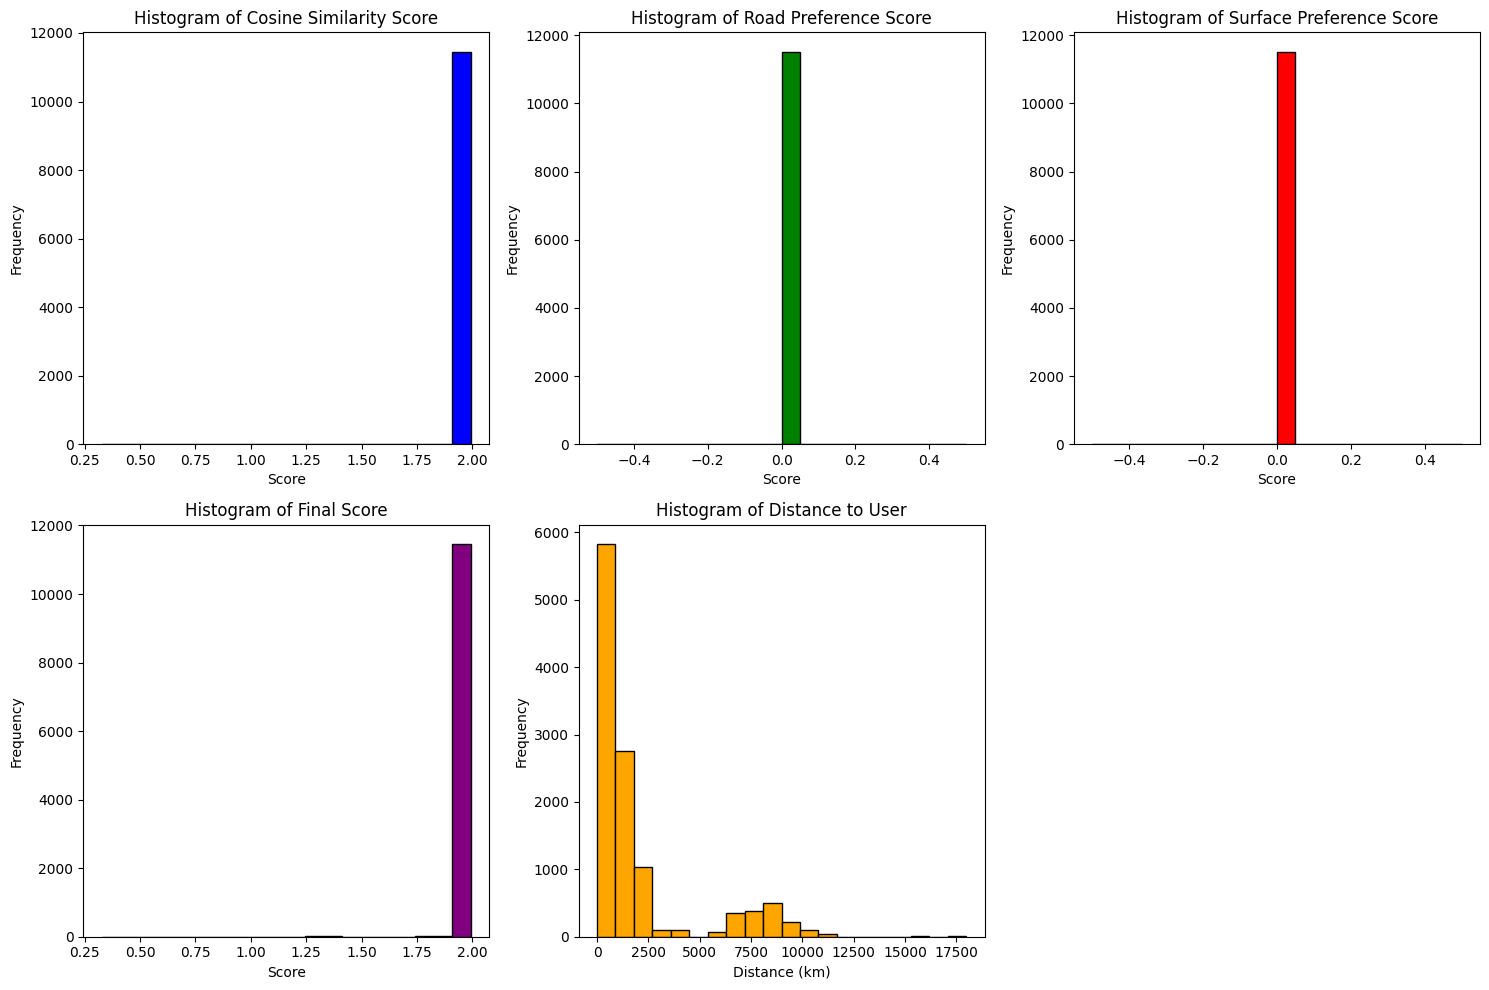

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('aanbevolen_routes_6361870.csv')
# Functie om histograms te plotten voor de gevraagde features
def plot_histograms(df):
    plt.figure(figsize=(15, 10))

    # Histogram voor cosine_similarity_score
    plt.subplot(2, 3, 1)
    plt.hist(df['cosine_similarity_score'], bins=20, color='blue', edgecolor='black')
    plt.title('Histogram of Cosine Similarity Score')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    # Histogram voor road_preference_score
    plt.subplot(2, 3, 2)
    plt.hist(df['road_preference_score'], bins=20, color='green', edgecolor='black')
    plt.title('Histogram of Road Preference Score')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    # Histogram voor surface_preference_score
    plt.subplot(2, 3, 3)
    plt.hist(df['surface_preference_score'], bins=20, color='red', edgecolor='black')
    plt.title('Histogram of Surface Preference Score')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    # Histogram voor final_score
    plt.subplot(2, 3, 4)
    plt.hist(df['final_score'], bins=20, color='purple', edgecolor='black')
    plt.title('Histogram of Final Score')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    # Histogram voor distance_to_user
    plt.subplot(2, 3, 5)
    plt.hist(df['distance_to_user'], bins=20, color='orange', edgecolor='black')
    plt.title('Histogram of Distance to User')
    plt.xlabel('Distance (km)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Aanroepen van de functie om de histograms te plotten
plot_histograms(df)


In [19]:
import pandas as pd

# Pad naar het invoer CSV-bestand
input_csv_path = 'aanbevolen_routes_5325166_v2.csv'  # Verander dit naar het pad van je invoerbestand
# Pad naar het uitvoer CSV-bestand
output_csv_path = 'output_file.csv'  # Verander dit naar het gewenste pad voor je uitvoerbestand

# Lees de eerste 100 rijen van het invoerbestand
df = pd.read_csv(input_csv_path, nrows=100)

# Schrijf deze rijen weg naar het uitvoerbestand
df.to_csv(output_csv_path, index=False)  # index=False om te voorkomen dat de index als een aparte kolom wordt geschreven


In [17]:
import pandas as pd

# Pad naar het CSV-bestand dat je hebt geüpload
input_csv_path = 'aanbevolen_routes_5325166_v2.csv'  # Pad naar het geüploade bestand

# De userId die je wilt filteren
specifieke_userId = 437241451  # Vervang 'jouw_userId_hier' met de daadwerkelijke userId

# Lees het CSV-bestand
df = pd.read_csv(input_csv_path)

# Filter de DataFrame op de specifieke userId
gefilterde_df = df[df['id'] == specifieke_userId]

# Pad naar het uitvoer CSV-bestand
output_csv_path = 'gefilterde_output.csv'  # Je kunt dit pad aanpassen

# Schrijf de gefilterde DataFrame weg naar een nieuw CSV-bestand
gefilterde_df.head()

,latitude,longitude,altitude,sport,id,heart_rate,timestamp,speed,distance,altitude_change,...,mean_longitude,orig_altitude_change,orig_distance,orig_mean_altitude,orig_average_condition_value,distance_to_user,cosine_similarity_score,road_preference_score,surface_preference_score,final_score
0,"[51.20404617860913, 51.2040719948709, 51.20410...","[3.244259459897876, 3.24430220760405, 3.244401...","[37.0, 35.8, 34.8, 34.8, 34.8, 35.0, 35.0, 34....",run,437241451,"[88, 90, 93, 96, 99, 103, 105, 109, 110, 113, ...","[1415928232, 1415928234, 1415928237, 141592823...","[7.8012, 8.5968, 7.218, 7.7940000000000005, 8....",-0.273797,-0.838863,...,3.243752,4.4,8.890907,35.0564,0.060693,11.031345,1.968241,0.0,0.0,1.968241


In [18]:
import pandas as pd

# Pad naar het CSV-bestand dat je hebt geüpload
input_csv_path = 'aanbevolen_routes_5325166.csv'  # Pad naar het geüploade bestand

# De userId die je wilt filteren
specifieke_userId = 437241451  # Vervang 'jouw_userId_hier' met de daadwerkelijke userId

# Lees het CSV-bestand
df = pd.read_csv(input_csv_path)

# Filter de DataFrame op de specifieke userId
gefilterde_df = df[df['id'] == specifieke_userId]

# Pad naar het uitvoer CSV-bestand
output_csv_path = 'gefilterde_output.csv'  # Je kunt dit pad aanpassen

# Schrijf de gefilterde DataFrame weg naar een nieuw CSV-bestand
gefilterde_df.head()

,latitude,longitude,altitude,sport,id,heart_rate,timestamp,speed,distance,altitude_change,...,mean_longitude,orig_altitude_change,orig_distance,orig_mean_altitude,orig_average_condition_value,distance_to_user,cosine_similarity_score,road_preference_score,surface_preference_score,final_score
11282,"[51.20404617860913, 51.2040719948709, 51.20410...","[3.244259459897876, 3.24430220760405, 3.244401...","[37.0, 35.8, 34.8, 34.8, 34.8, 35.0, 35.0, 34....",run,437241451,"[88, 90, 93, 96, 99, 103, 105, 109, 110, 113, ...","[1415928232, 1415928234, 1415928237, 141592823...","[7.8012, 8.5968, 7.218, 7.7940000000000005, 8....",-0.273797,-0.838863,...,3.243752,4.4,8.890907,35.0564,0.060693,11.031345,1.968241,0.0,0.0,1.968241


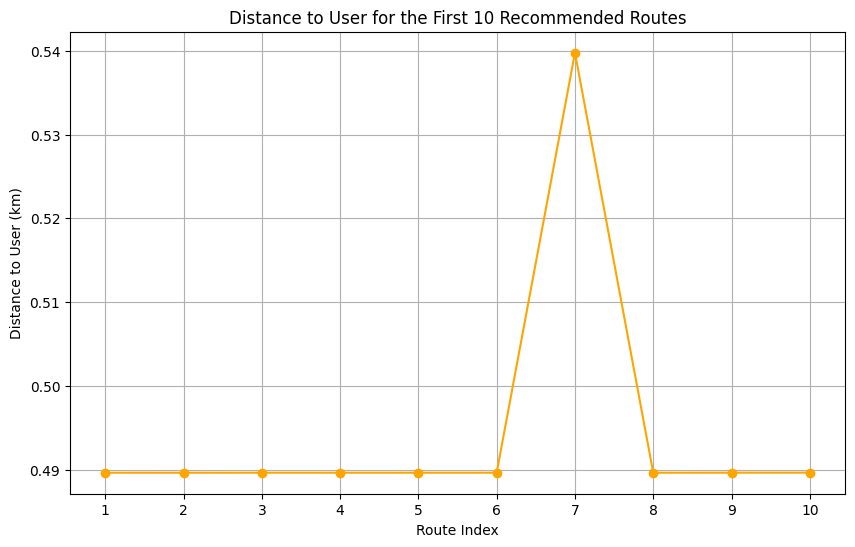

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Laad de data
df = pd.read_csv('aanbevolen_routes_5325166_v2.csv')

# Aangepaste functie om een lijngrafiek te maken voor de distance_to_user van de eerste 10 rijen
def plot_distance_to_user(df):
    # Beperk de DataFrame tot de eerste 10 rijen
    first_10_rows = df.head(10)

    # Maak een lijngrafiek voor de distance_to_user
    plt.figure(figsize=(10, 6))
    plt.plot(first_10_rows['distance_to_user_normalized'], marker='o', linestyle='-', color='orange')
    plt.title('Distance to User for the First 10 Recommended Routes')
    plt.xlabel('Route Index')
    plt.ylabel('Distance to User (km)')
    plt.xticks(range(len(first_10_rows)), range(1, 11))  # Zet de x-ticks om de routes te nummeren van 1 tot 10
    plt.grid(True)
    plt.show()

# Aanroepen van de functie om de lijngrafiek te plotten
plot_distance_to_user(df)


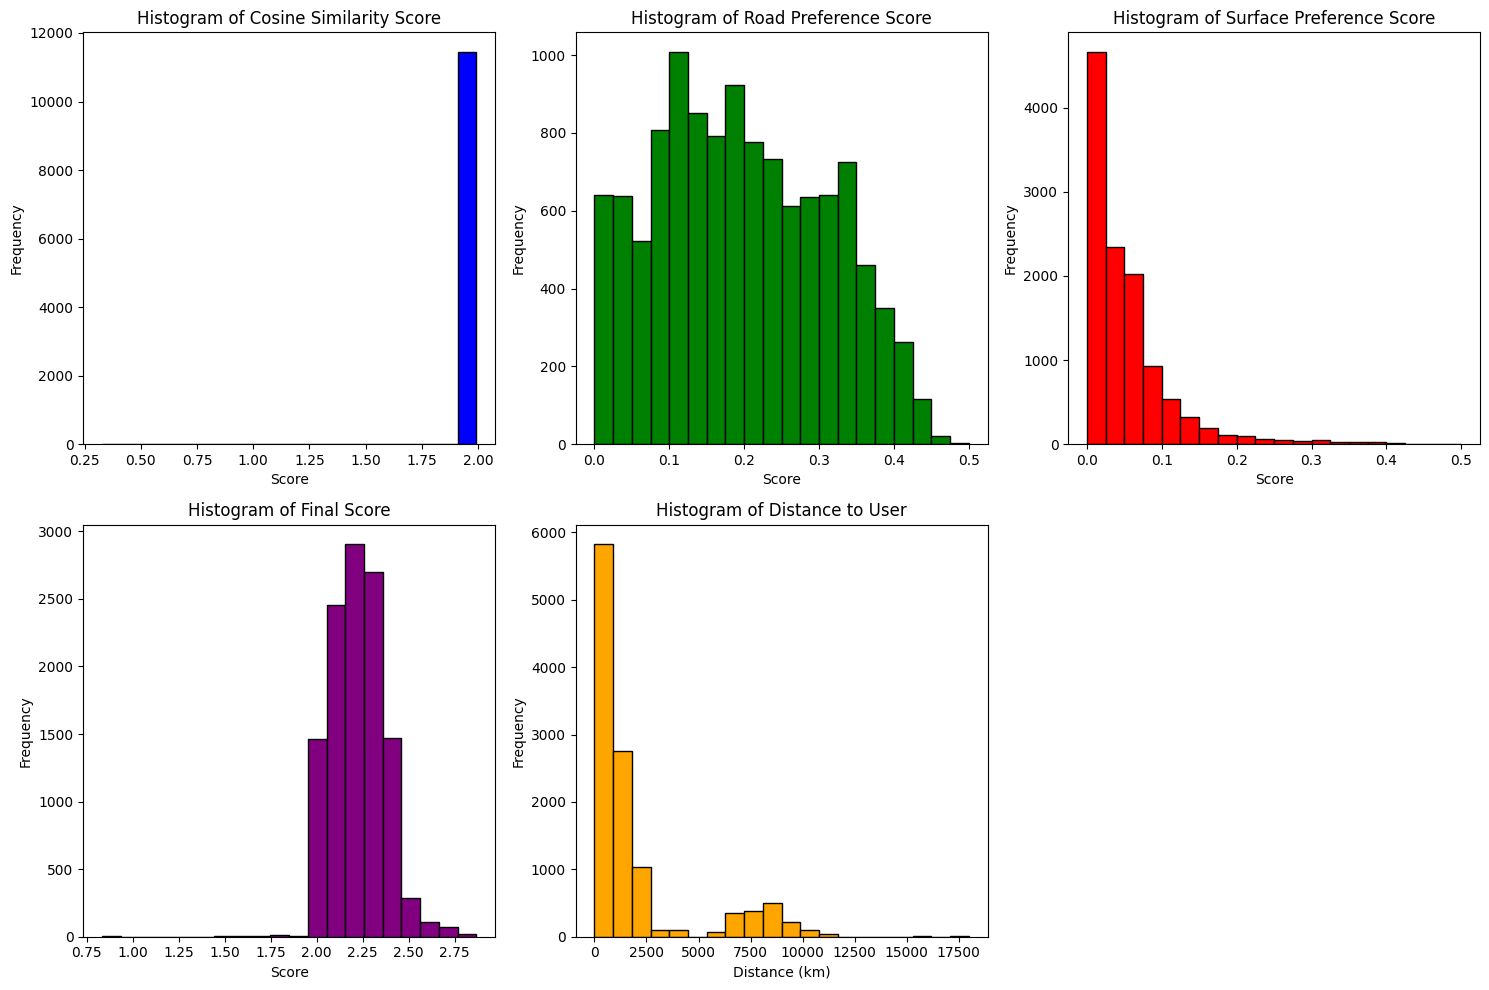

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('aanbevolen_routes_6361870_v2.csv')
# Functie om histograms te plotten voor de gevraagde features
def plot_histograms(df):
    plt.figure(figsize=(15, 10))

    # Histogram voor cosine_similarity_score
    plt.subplot(2, 3, 1)
    plt.hist(df['cosine_similarity_score'], bins=20, color='blue', edgecolor='black')
    plt.title('Histogram of Cosine Similarity Score')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    # Histogram voor road_preference_score
    plt.subplot(2, 3, 2)
    plt.hist(df['road_preference_score'], bins=20, color='green', edgecolor='black')
    plt.title('Histogram of Road Preference Score')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    # Histogram voor surface_preference_score
    plt.subplot(2, 3, 3)
    plt.hist(df['surface_preference_score'], bins=20, color='red', edgecolor='black')
    plt.title('Histogram of Surface Preference Score')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    # Histogram voor final_score
    plt.subplot(2, 3, 4)
    plt.hist(df['final_score'], bins=20, color='purple', edgecolor='black')
    plt.title('Histogram of Final Score')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    # Histogram voor distance_to_user
    plt.subplot(2, 3, 5)
    plt.hist(df['distance_to_user'], bins=20, color='orange', edgecolor='black')
    plt.title('Histogram of Distance to User')
    plt.xlabel('Distance (km)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Aanroepen van de functie om de histograms te plotten
plot_histograms(df)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Laad de data
df = pd.read_csv('aanbevolen_routes_6361870_v2.csv')

# Aangepaste functie om een lijngrafiek te maken voor de distance_to_user van de eerste 10 rijen
def plot_distance_to_user(df):
    # Beperk de DataFrame tot de eerste 10 rijen
    first_10_rows = df.head(10)

    # Maak een lijngrafiek voor de distance_to_user
    plt.figure(figsize=(10, 6))
    plt.plot(first_10_rows['distance_to_user'], marker='o', linestyle='-', color='orange')
    plt.title('Distance to User for the First 10 Recommended Routes')
    plt.xlabel('Route Index')
    plt.ylabel('Distance to User (km)')
    plt.xticks(range(len(first_10_rows)), range(1, 11))  # Zet de x-ticks om de routes te nummeren van 1 tot 10
    plt.grid(True)
    plt.show()

# Aanroepen van de functie om de lijngrafiek te plotten
plot_distance_to_user(df)


In [3]:
# Voorbeeldfunctie om een specifieke waarde voor de feature 'distance_to_user' op te halen uit een bepaalde rij

def get_distance_to_user(row_index, dataframe):
    """
    Haalt de waarde van 'distance_to_user' op voor een specifieke rij.

    Parameters:
    - row_index: De index van de rij waarvan de waarde moet worden opgehaald.
    - dataframe: De dataframe die de gegevens bevat.

    Returns:
    - De waarde van 'distance_to_user' voor de gegeven rij, of een foutmelding als de index niet bestaat.
    """
    try:
        distance_value = dataframe.loc[row_index, 'distance_to_user']
        return distance_value
    except KeyError:
        return "Rij index bestaat niet."

# Voorbeeld: haal de waarde van 'distance_to_user' op voor de rij met index 2
distance_value_example = get_distance_to_user(648, df)
distance_value_example


217.48943515723445

In [10]:
def get_distances_for_users(user_ids, dataframe):
    """
    Haalt de waarden van 'distance_to_user' op voor een lijst van user_ids.

    Parameters:
    - user_ids: Een lijst van userId's waarvoor de 'distance_to_user' waarde opgehaald moet worden.
    - dataframe: De dataframe die de gegevens bevat, inclusief 'userId' en 'distance_to_user' kolommen.

    Returns:
    - Een dictionary waarbij elke key de userId is en de bijbehorende waarde de 'distance_to_user' is.
    """
    distances = {}
    for user_id in user_ids:
        # Zet user_id om naar string om overeen te komen met het dataframe, indien nodig
        user_id_str = str(user_id)
        print(user_id_str)
        # Filter de dataframe voor de gegeven userId
        user_row = dataframe[dataframe['userId'] == user_id_str]
        # Controleer of er een rij bestaat voor de gegeven userId
        if not user_row.empty:
            # Aanname: elke userId komt maximaal één keer voor in de dataframe
            distances[user_id] = user_row['distance_to_user'].iloc[0]
        else:
            distances[user_id] = "UserId niet gevonden."
    
    return distances

# Zorg ervoor dat de userIds in de lijst overeenkomen met het datatype in het DataFrame
user_ids_example = [590780320, 590780311, 317835262, 261144276, 635819698, 47833644, 398562139, 614091189, 329268144, 314388539]
distances = get_distances_for_users(user_ids_example, df)
print(distances)


590780320
590780311
317835262
261144276
635819698
47833644
398562139
614091189
329268144
314388539
{590780320: 'UserId niet gevonden.', 590780311: 'UserId niet gevonden.', 317835262: 'UserId niet gevonden.', 261144276: 'UserId niet gevonden.', 635819698: 'UserId niet gevonden.', 47833644: 'UserId niet gevonden.', 398562139: 'UserId niet gevonden.', 614091189: 'UserId niet gevonden.', 329268144: 'UserId niet gevonden.', 314388539: 'UserId niet gevonden.'}


In [9]:
import pandas as pd

# Laad het dataframe
# df = pd.read_csv('aanbevolen_routes_6361870_v2.csv')
df = pd.read_csv('aanbevolen_routes_8899244.csv')

def get_distances_for_users(user_ids, dataframe):
    """
    Haalt de waarden van 'distance_to_user' op voor een lijst van user_ids.

    Parameters:
    - user_ids: Een lijst van userId's waarvoor de 'distance_to_user' waarde opgehaald moet worden.
    - dataframe: De dataframe die de gegevens bevat, inclusief 'userId' en 'distance_to_user' kolommen.

    Returns:
    - Een dictionary waarbij elke key de userId is en de bijbehorende waarde de 'distance_to_user' is.
    """
    distances = {}
    for user_id in user_ids:
        print(user_id)
        # Filter de dataframe voor de gegeven userId
        user_row = dataframe[dataframe['userId'] == user_id]
        # Controleer of er een rij bestaat voor de gegeven userId
        if not user_row.empty:
            # Aanname: elke userId komt maximaal één keer voor in de dataframe
            distances[user_id] = user_row['distance_to_user'].iloc[0]
        else:
            distances[user_id] = "UserId niet gevonden."
    
    return distances

# Voorbeeld: Haal de 'distance_to_user' waarden op voor een lijst van userId's
user_ids_example = [590780320, 590780311, 317835262, 261144276, 635819698, 47833644, 398562139, 614091189, 329268144, 314388539] # Vervang deze waarden met daadwerkelijke userId's uit je dataframe
distances = get_distances_for_users(user_ids_example, df)
print(distances)


590780320
590780311
317835262
261144276
635819698
47833644
398562139
614091189
329268144
314388539
{590780320: 'UserId niet gevonden.', 590780311: 'UserId niet gevonden.', 317835262: 'UserId niet gevonden.', 261144276: 'UserId niet gevonden.', 635819698: 'UserId niet gevonden.', 47833644: 'UserId niet gevonden.', 398562139: 'UserId niet gevonden.', 614091189: 'UserId niet gevonden.', 329268144: 'UserId niet gevonden.', 314388539: 'UserId niet gevonden.'}


In [ ]:
import json
import pandas as pd
import folium

# Load and process the JSON data manually
data_path = 'bijgewerkte_gebruikersprofielen_v2.json'
with open(data_path) as file:
    data_lines = file.readlines()

# Parse each line as a separate JSON object
users_data = [json.loads(line) for line in data_lines]

# Convert to DataFrame
df = pd.DataFrame(users_data)

# Create a new map
m_new = folium.Map(location=[52.3680, 4.9036], zoom_start=2)

# Loop through the new DataFrame to add markers
for index, row in df.iterrows():
    folium.Marker(
        location=row['average_location'],
        popup=f"UserID: {row['userId']}",
        icon=folium.Icon(color='red')
    ).add_to(m_new)

# Save the new map
map_path_new = '/mnt/data/user_locations_map_new.html'
m_new.save(map_path_new)

# Output the path to the saved map
print(map_path_new)


In [1]:
import json
import pandas as pd
import folium

# Load and process the JSON data manually
data_path = 'bijgewerkte_gebruikersprofielen_v2.json'
with open(data_path) as file:
    data_lines = file.readlines()

# Parse each line as a separate JSON object
users_data = [json.loads(line) for line in data_lines]

# Convert to DataFrame
df = pd.DataFrame(users_data)

# Create a new map
m_new = folium.Map(location=[52.3680, 4.9036], zoom_start=2)

# Loop through the new DataFrame to add markers
for index, row in df.iterrows():
    folium.Marker(
        location=row['average_location'],
        popup=f"UserID: {row['userId']}",
        icon=folium.Icon(color='red')
    ).add_to(m_new)

# To display the map directly in a Jupyter notebook, simply call the map object.
m_new


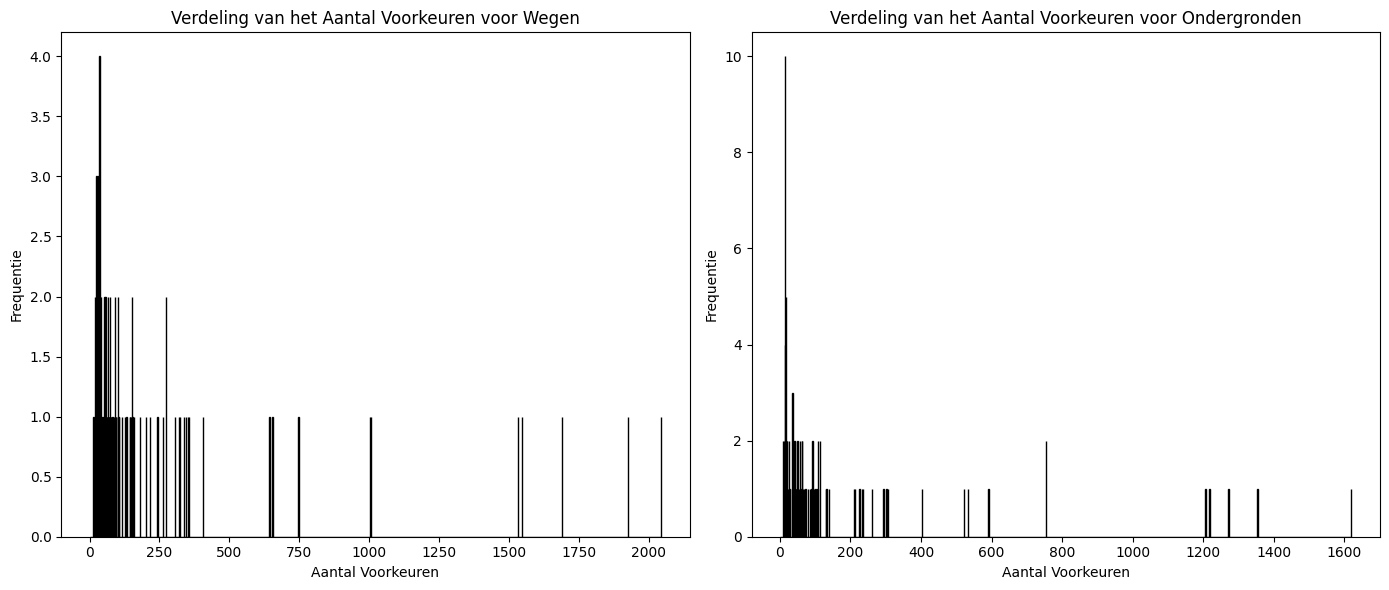

In [1]:
# Now that we've confirmed the necessary data is in the provided JSON file, let's proceed with the analysis.
# First, we need to load the JSON file and analyze the "voorkeur_wegen" (road preferences) and "voorkeur_ondergronden" (surface preferences).

import pandas as pd

# Load the JSON data
file_path = 'demo.json'
data = pd.read_json(file_path, lines=True)

# Extract and prepare data for "voorkeur_wegen" and "voorkeur_ondergronden"
road_prefs = data['highways'].apply(lambda x: sum(x.values()))
surface_prefs = data['surfaces'].apply(lambda x: sum(x.values()))

# Let's plot histograms for both "voorkeur_wegen" and "voorkeur_ondergronden"
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for road preferences
ax[0].hist(road_prefs, bins=range(1, max(road_prefs) + 1), color='skyblue', edgecolor='black')
ax[0].set_title('Verdeling van het Aantal Voorkeuren voor Wegen')
ax[0].set_xlabel('Aantal Voorkeuren')
ax[0].set_ylabel('Frequentie')

# Histogram for surface preferences
ax[1].hist(surface_prefs, bins=range(1, max(surface_prefs) + 1), color='lightgreen', edgecolor='black')
ax[1].set_title('Verdeling van het Aantal Voorkeuren voor Ondergronden')
ax[1].set_xlabel('Aantal Voorkeuren')
ax[1].set_ylabel('Frequentie')

plt.tight_layout()
plt.show()
